In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [55]:
data = pd.read_csv('../fake data/fake.csv')
data.iloc[0].x

4.0

In [32]:
def cost_func(data,weight,biais):
    m = data.shape[0]
    MSE = 0
    for i in range(m):
        x= data.iloc[i].x
        y = data.iloc[i].x
        MSE += (y - (weight*x+biais))**2
    MSE /=m
    return MSE
cost_func(data,15,600)

1846084.127482736

In [81]:
def compute_gradient(data,weight,biais):
    dMSE_dw = 0
    DMSE_db = 0
    MSE = 0
    n = len(data)
    for i in range(n):
        x = data.iloc[i].x
        y = data.iloc[i].y
        MSE +=(y-(weight*x+biais))**2
        dMSE_dw += x*((biais+weight*x)-y)
        DMSE_db += weight*x+biais-y
    MSE/=n
    dMSE_dw /=n
    DMSE_db /=n
    return dMSE_dw,DMSE_db,MSE
        

In [129]:
def gradient_descent(data,weight,biais,lr,numIter):
    y =[1,3000]
    for i in range(numIter):
        
        dmse_dw,dmse_db,MSE = compute_gradient(data,weight,biais)
        y.append(MSE)
        y = y[1:]
        print(y)
        if y[0]-y[1]< 0.001:
            break
        weight -= lr*dmse_dw
        biais -= lr*dmse_db
    return weight, biais
print(gradient_descent(data,0,0,.0005,10000))

2510.955
[3000, 2510.955]
1287.9302002874256
[2510.955, 1287.9302002874256]
708.0794537975405
[1287.9302002874256, 708.0794537975405]
433.15566588566065
[708.0794537975405, 433.15566588566065]
302.7968695449507
[433.15566588566065, 302.7968695449507]
240.97592109954206
[302.7968695449507, 240.97592109954206]
211.64857213136776
[240.97592109954206, 211.64857213136776]
197.72634895521142
[211.64857213136776, 197.72634895521142]
191.10765573463897
[197.72634895521142, 191.10765573463897]
187.9515493687108
[191.10765573463897, 187.9515493687108]
186.43704986691841
[187.9515493687108, 186.43704986691841]
185.70083589361258
[186.43704986691841, 185.70083589361258]
185.33360930519785
[185.70083589361258, 185.33360930519785]
185.14132303723582
[185.33360930519785, 185.14132303723582]
185.0319799379127
[185.14132303723582, 185.0319799379127]
184.9619644231508
[185.0319799379127, 184.9619644231508]
184.91059846988009
[184.9619644231508, 184.91059846988009]
184.86807868621068
[184.91059846988009,

In [117]:
45.355012044971765-45.35496120950513<0.0001


True

In [11]:
import sympy as smp


In [24]:
x_i,y_i,w,b,n,i = smp.symbols('x_i,y_i,w,b,n,i')
f = y_i -(w*x_i+b)
MSE = 1/(2*n)*smp.Sum(f**2,(i,1,n))
s=smp.diff(MSE,b)
s

Sum(2*b + 2*w*x_i - 2*y_i, (i, 1, n))/(2*n)

In [59]:
def gradient_descent(m_now,b_now,points,L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        m_gradient += -(2/n)*x*(y-(m_now*x+b_now))
        b_gradient += -(2/n)+(y-(m_now*x+b_now))
    m = m_now-L*m_gradient
    b = b_now -L*b_gradient
    return m,b


In [65]:
for i in range(3000):
    m,b = gradient_descent(0,0,data,0.001)
    if i%50 ==0:
        print(f'epoch{i}')
        print(m,b)

    

epoch0
5.604000000000001 -4.774999999999998
epoch50
5.604000000000001 -4.774999999999998
epoch100
5.604000000000001 -4.774999999999998
epoch150
5.604000000000001 -4.774999999999998
epoch200
5.604000000000001 -4.774999999999998
epoch250
5.604000000000001 -4.774999999999998
epoch300
5.604000000000001 -4.774999999999998
epoch350
5.604000000000001 -4.774999999999998
epoch400
5.604000000000001 -4.774999999999998
epoch450
5.604000000000001 -4.774999999999998
epoch500
5.604000000000001 -4.774999999999998
epoch550
5.604000000000001 -4.774999999999998
epoch600
5.604000000000001 -4.774999999999998
epoch650
5.604000000000001 -4.774999999999998
epoch700
5.604000000000001 -4.774999999999998
epoch750
5.604000000000001 -4.774999999999998
epoch800
5.604000000000001 -4.774999999999998
epoch850
5.604000000000001 -4.774999999999998
epoch900
5.604000000000001 -4.774999999999998
epoch950
5.604000000000001 -4.774999999999998
epoch1000
5.604000000000001 -4.774999999999998
epoch1050
5.604000000000001 -4.77499

In [77]:
y = [1,2]
for i in range(3,12):
    y.append(i)
    y = y[1:]
y

[10, 11]

In [80]:
1.0*10**(-100)

1e-100

# Multiple linear regression:

In [37]:
df = pd.read_csv('california_housing_train.csv')
bedroomCorrDf =  df.corr()['total_bedrooms']
bedroomCorrDict=bedroomCorrDf.to_dict()
for key in list(bedroomCorrDict.keys()):
    if abs(bedroomCorrDict[key]) <.1:
        print(key,abs(bedroomCorrDict[key]))
        df = df.drop([key],axis=1)
bedrooms  = df['total_bedrooms']
bedrooms
df = df.drop('total_bedrooms',axis=1)
df['bedrooms']=bedrooms

longitude 0.07180195592382478
latitude 0.06937291517634288
median_income 0.013494682320925554
median_house_value 0.045783051979547004


,housing_median_age,total_rooms,population,households,bedrooms
0,15.0,5612.0,1015.0,472.0,1283.0
1,19.0,7650.0,1129.0,463.0,1901.0
2,17.0,720.0,333.0,117.0,174.0
3,14.0,1501.0,515.0,226.0,337.0
4,20.0,1454.0,624.0,262.0,326.0
...,...,...,...,...,...
16995,52.0,2217.0,907.0,369.0,394.0
16996,36.0,2349.0,1194.0,465.0,528.0
16997,17.0,2677.0,1244.0,456.0,531.0
16998,19.0,2672.0,1298.0,478.0,552.0


In [38]:
df = df.drop('housing_median_age',axis=1)
df

,total_rooms,population,households,bedrooms
0,5612.0,1015.0,472.0,1283.0
1,7650.0,1129.0,463.0,1901.0
2,720.0,333.0,117.0,174.0
3,1501.0,515.0,226.0,337.0
4,1454.0,624.0,262.0,326.0
...,...,...,...,...
16995,2217.0,907.0,369.0,394.0
16996,2349.0,1194.0,465.0,528.0
16997,2677.0,1244.0,456.0,531.0
16998,2672.0,1298.0,478.0,552.0


In [41]:
np_df = df.to_numpy()
np_df.shape

(17000, 4)

In [42]:
X_train,Y_train = np_df[:,:3] ,np_df[:,-1]
X_train.shape,Y_train.shape

((17000, 3), (17000,))

In [43]:
from sklearn.linear_model import LinearRegression

In [68]:
sklearn_model  =  LinearRegression().fit(X_train,Y_train)

sklearn_predictions  = sklearn_model.predict(X_train)
print(sklearn_model.intercept_)
# sklearn_predictions.shape

1.5496502025256405


In [57]:
df['sklearn_bedroomsPred'] = sklearn_predictions
df

,total_rooms,population,households,bedrooms,sklearn_bedroomsPred
0,5612.0,1015.0,472.0,1283.0,631.829860
1,7650.0,1129.0,463.0,1901.0,693.119562
2,720.0,333.0,117.0,174.0,130.849378
3,1501.0,515.0,226.0,337.0,259.462982
4,1454.0,624.0,262.0,326.0,289.315311
...,...,...,...,...,...
16995,2217.0,907.0,369.0,394.0,412.047168
16996,2349.0,1194.0,465.0,528.0,501.086730
16997,2677.0,1244.0,456.0,531.0,502.561260
16998,2672.0,1298.0,478.0,552.0,522.072603


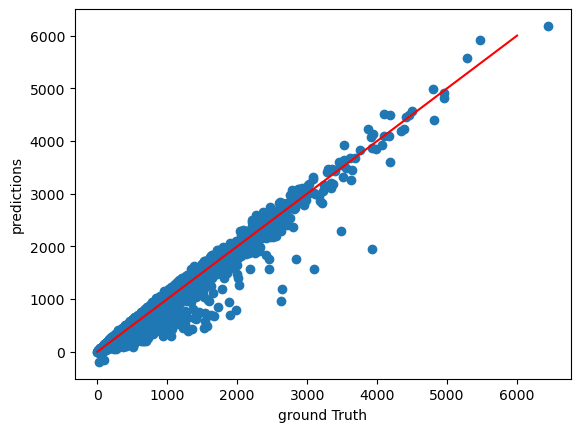

In [66]:
plt.scatter(df['bedrooms'],df['sklearn_bedroomsPred'])
plt.xlabel('ground Truth')
y = [0,6000]
def f(y):
    return y
plt.plot(y,f(y),'r')
plt.ylabel('predictions')
plt.show()

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [55]:
print(mean_squared_error(sklearn_predictions,Y_train))
mean_absolute_error(sklearn_predictions,Y_train)

5650.631822167878


39.67221765070658

In [118]:
weights = [ 0.03619529 ,-0.03248088,  0.9748312 ]
biais = 1.5496502025256405
def our_mean_squared_error(Weights,biais,features,ground_truth):
    error = .0
    for i in range(ground_truth.shape[0]):
        error += (np.dot(features[i],Weights)+biais-ground_truth[i])**2
    return error/(2*ground_truth.shape[0])
our_mean_squared_error(weights,biais,X_train,Y_train)

2825.315911083964

In [101]:
def our_computation_gradDex(weights,biais,features,ground_truth):
    dj_dw = np.zeros(weights.shape[0])
    dj_db = .0
    n = features.shape[0]
    MSE = 0
    for i in range(n):
        err = np.dot(features[i],weights)+biais-ground_truth[i]
        MSE +=err**2
        dj_db += err
        for j in range(weights.shape[0]):
            dj_dw[j] += err*features[i,j]
    return dj_dw/n,dj_db/n,MSE/(2*n)        


In [120]:
def our_gradient_deX(features,ground_truth,lr,numIter):
    weights = np.zeros(features.shape[1])
    biais = .0
    cond = [1,240000]
    for i in range(numIter):
        if i%50 ==0:
            print(f'iteration {i}')
            print(cond)
        dj_dw,dj_db,MSE = our_computation_gradDex(weights,biais,features,ground_truth)
        cond.append(MSE)
        cond = cond[1:]
        if cond[0]-cond[1]<.01:
            print(cond)
            break
        
        biais -= lr*dj_db
        for j in range(weights.shape[0]):
            weights[j] -= lr*dj_dw[j]
    return weights,biais

In [122]:
our_gradient_deX(X_train,Y_train,.0000001,5000)

iteration 0
[1, 240000]
iteration 50
[8825.667043062303, 8806.37605157737]
iteration 100
[7971.800762367078, 7956.358487936253]
iteration 150
[7255.825687471808, 7242.589188402269]
iteration 200
[6640.315050633218, 6628.920583382212]
iteration 250
[6110.366984316135, 6100.555678106727]
iteration 300
[5654.045692280431, 5645.597450060826]
iteration 350
[5261.1198999965145, 5253.845347412993]
iteration 400
[4922.782128331525, 4916.51820775806]
iteration 450
[4631.448618901486, 4626.054926212373]
iteration 500
[4380.589208760793, 4375.944845778651]
iteration 550
[4164.580951444799, 4160.581816018158]
iteration 600
[3978.582079763762, 3975.1385323439786]
iteration 650
[3818.4234788692647, 3815.4583332641428]
iteration 700
[3680.515236660783, 3677.9620299265703]
iteration 750
[3561.766176867404, 3559.5676795598038]
iteration 800
[3459.514571159842, 3457.621504551313]
iteration 850
[3371.468477222882, 3369.838408733274]
iteration 900
[3295.6543654824904, 3294.250757563949]
iteration 950
[323

(array([ 0.03682251, -0.0312135 ,  0.96968726]), 0.0010712561165832266)

,total_rooms,population,households,bedrooms,sklearn_bedroomsPred,new_predictions
0,5612.0,1015.0,472.0,1283.0,631.829860,632.659682
1,7650.0,1129.0,463.0,1901.0,693.119562,695.418433
2,720.0,333.0,117.0,174.0,130.849378,129.572592
3,1501.0,515.0,226.0,337.0,259.462982,258.346027
4,1454.0,624.0,262.0,326.0,289.315311,288.121839
...,...,...,...,...,...,...
16995,2217.0,907.0,369.0,394.0,412.047168,411.140530
16996,2349.0,1194.0,465.0,528.0,501.086730,500.132804
16997,2677.0,1244.0,456.0,531.0,502.561260,501.922727
16998,2672.0,1298.0,478.0,552.0,522.072603,521.386205


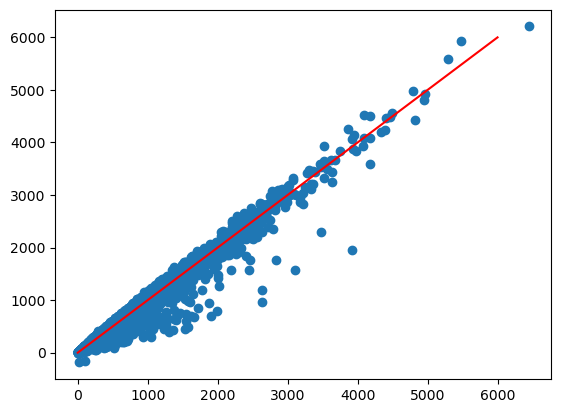

In [126]:
def calc_predictions(weights,biais,features):
    return np.dot(features,weights)+biais

new_weights = [ 0.03682251, -0.0312135 ,  0.96968726]
new_biais = 0.0010712561165832266
new_predictions =calc_predictions(new_weights,new_biais,X_train)
y = [0,6000]
def f(y):
    return y
plt.plot(y,f(y),'r')
plt.scatter(Y_train,new_predictions)
df['new_predictions']=new_predictions
df

In [ ]:
calc_predictions()

In [117]:
weights = [ 0.03619529 ,-0.03248088,  0.9748312 ]
2826.090894756433-2826.089896375744<.001

True